In [28]:
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.image as mpimg
import math
%matplotlib inline
random.seed(5)

This file is in png format. each picture in a png file contains 4 channels(Red,Green,Blue,Alpha). Here we will ignore the 4th channel since Alpha. 

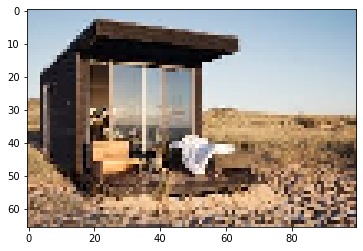

In [29]:
img = mpimg.imread('ex24pick.png',0)
data = img[:,:,:3]
plt.imshow(data);


In [67]:
data.shape

print(data[0][0])

[160 184 210]


Lets create our very own K-means cluster alogrithms  
Kmeans is done in these 5 steps:  
Step 1: Choose the number of clusters k and set the centroids to random numbers. ... 
Step 2: Assign all the points to the closest cluster centroid. ...  
Step 3: Recompute the centroids of newly formed clusters. ...  
Step 4: Repeat steps 2 and 3.  

Lets get started! First lets create a set of clusters and initalize them with random points:

In [31]:
amount_of_clusters = 5
n_dimensions = 3
def getcentroids(amount_of_clusters,n_dimensions,minpoint,maxpoint):
    centroids = []
    for _ in range(amount_of_clusters):
        centroids.append([random.randint(minpoint,maxpoint) for _ in range(n_dimensions)])
    #return a list of size: amount_of_clusters with range 0 to 100
        
    return centroids #example [[11,51,99],[23,21,59],[50,51,11],[51,91,51],[21,1,31]]

centroids = getcentroids(amount_of_clusters,n_dimensions,0,255)
print(centroids)

[[130, 183, 14], [238, 127, 26], [80, 57, 190], [240, 126, 194], [52, 127, 6]]


Step 1: Create a function getting the distance of 2 points of n dimensions. 

In [32]:

# test
# print(distance([1,1], [2,2]))

if(round(distance([52, 14, 194], [114, 64, 64]),2) == round(152.4598307751914,2)):
    print("Nice Work!")
else:
    print("Not quite")

1.4142135623730951
Nice Work!


Step 2: Assign all the points to the closest cluster centroid. ...
Hint: N-dimensional pythagorean theroem = a^2+b^2+c^2.....n^2 = s^2

(66, 100)
5
[[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [0. 1. 3. ... 2. 3. 3.]
 [0. 3. 1. ... 4. 4. 3.]
 [1. 0. 4. ... 4. 3. 4.]]


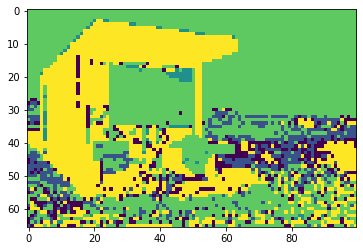

In [74]:
#data contains 66*100 points.
def linkpointtocentroid(data,centroids):
    #link each point to a centroid
    #returned should be a matrix of shape (66, 100) containing the numbers: 1 to amount of clusters (sudo randomly though).
    labels = np.zeros(data.shape[:len(data.shape)-1])
    points_linked_to_centroid_dict = {centroid: [] for centroid in range(len(centroids))}
    

    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            point = data[row][col]
            list_of_distance = []
            for centroid in centroids:
                list_of_distance.append(distance(point, centroid))
                c_centroid = int(np.argmin(list_of_distance))
                labels[row][col] = c_centroid
                points_linked_to_centroid_dict[c_centroid].append(point)
    # iterate over all data points
    # get the distance to each centroid
    # choose the closest distance and put it to the according position in labels 

    # return labels
    return labels, points_linked_to_centroid_dict  #only uncomment this line and remove line above once you get to step 3

# labels = linkpointtocentroid(data,centroids)
labels, points_linked_to_centroid_dict = linkpointtocentroid(data,centroids)
#only uncomment line above once you get to step 3
print(labels.shape)
print(len(points_linked_to_centroid_dict))
print(labels)
plt.imshow(labels);

One your first run, you can plot what point belong to with centroid with plt.imshow(labels). Plt assigns a color to each number.

Step 3: Recompute the centroids of newly formed clusters. ...  One way is to have linkpointtocentroid return 2 items, labels and points_linked_to_centroid, a (amount_of_centroids, n) size list that contains what point belongs to which centroid. You can then average that list to get what your updated centroid should be.  

HINT: REMEMBER TO AVERAGE for each dimension. use np.mean(points_of_a_SINGLE_centroid,axis = 0) may be helpful.


In [164]:
#update your linkpointtocentroid function.
#labels, points_linked_to_centroid = linkpointtocentroid(data,centroids)

def updatecentroids(points_linked_to_centroid_dict): #You may only need points_linked_to_centroid to do this.
    dimensions = 3
    newcentroids = np.zeros((5,3))
    #set centroids to be the average of the points linked to them.
    return newcentroids

centroids = updatecentroids(points_linked_to_centroid_dict)
print(centroids)

[[117.2122213   89.02725021  67.03963666]
 [170.82287188 191.26483233 208.36371453]
 [216.98376623 216.96590909 213.60227273]
 [187.95311573 154.66706231 121.42195846]
 [ 40.28265852  28.29946524  23.8670741 ]]


Repeat 2 and 3

In [165]:
def Kmeans(data,centroids):
    return labels
final = Kmeans(data,getcentroids(amount_of_clusters,n_dimensions,0,255))

Create a new "dataset/picture" where each each point is a different color. Hint: set amount of clusters to 3 and for each item in label, 
if label = 1 append [255,0,0]
if label = 2 append [0,255,0]
if label = 3 append [0,0,255]
resulting shape should be 66,100,3

In [166]:
def draw():
    #create a new image
    #and use plt.imshow(matrix) to show new image.
    pass

1211

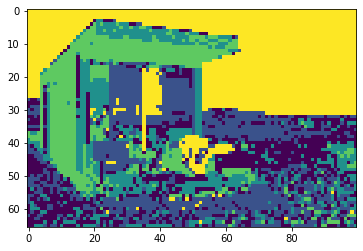

In [168]:
plt.imshow(final)